In [1]:
import numpy as np
import xarray as xr
from dask import array as da 

In [2]:
import pandas as pd
df_category = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengeti/df_category_lut_adapted.df')

In [11]:
len(df_category.values[:46])

46

In [12]:
df_bala_train = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_balanced_top_10_metadata_train.df')
df_bala_train

,img_name,bbox_pixel_level,category_id
0,S1/M09/M09_R1/S1_M09_R1_PICT0251,"[1.0938368, 752.0255999999999, 798.1056, 467.0...",0
1,S4/P12/P12_R2/S4_P12_R2_IMAG1570,"[1962.1888, 487.9872, 85.13536, 413.952]",0
2,S2/E02/E02_R3/S2_E02_R3_PICT1970,"[964.8128, 413.6448, 263.7824, 297.06239999999...",0
3,S5/I13/I13_R2/S5_I13_R2_IMAG0129,"[1098.1376, 509.3376, 353.6896, 776.4479999999...",0
4,S5/I08/I08_R2/S5_I08_R2_IMAG0239,"[1495.4496, 713.3184, 253.3376, 170.3424]",0
...,...,...,...
174995,S5/P13/P13_R3/S5_P13_R3_IMAG1337,"[112.70144, 718.8480000000001, 76.77952, 38.01...",9
174996,S5/H02/H02_R1/S5_H02_R1_IMAG0406,"[1643.1104, 794.2656, 97.95584, 123.648]",9
174997,S4/P04/P04_R2/S4_P04_R2_IMAG1076,"[868.7616, 623.9232, 123.10528, 133.95456]",9
174998,S4/D02/D02_R1/S4_D02_R1_IMAG1064,"[1673.8304, 377.856, 371.712, 440.5248]",9


In [17]:
df_bala_train_2 = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_balanced_top_10_metadata_train_2.df')
df_bala_train_2

,img_name,bbox_pixel_level,category_id,resized_name
0,S1/M09/M09_R1/S1_M09_R1_PICT0251,"[1.0938368, 752.0255999999999, 798.1056, 467.0...",0,S1/M09/M09_R1/S1_M09_R1_PICT0251_54181
1,S4/P12/P12_R2/S4_P12_R2_IMAG1570,"[1962.1888, 487.9872, 85.13536, 413.952]",0,S4/P12/P12_R2/S4_P12_R2_IMAG1570_719498
2,S2/E02/E02_R3/S2_E02_R3_PICT1970,"[964.8128, 413.6448, 263.7824, 297.06239999999...",0,S2/E02/E02_R3/S2_E02_R3_PICT1970_306386
3,S5/I13/I13_R2/S5_I13_R2_IMAG0129,"[1098.1376, 509.3376, 353.6896, 776.4479999999...",0,S5/I13/I13_R2/S5_I13_R2_IMAG0129_1114500
4,S5/I08/I08_R2/S5_I08_R2_IMAG0239,"[1495.4496, 713.3184, 253.3376, 170.3424]",0,S5/I08/I08_R2/S5_I08_R2_IMAG0239_993566
...,...,...,...,...
174995,S5/P13/P13_R3/S5_P13_R3_IMAG1337,"[112.70144, 718.8480000000001, 76.77952, 38.01...",9,S5/P13/P13_R3/S5_P13_R3_IMAG1337_1201557
174996,S5/H02/H02_R1/S5_H02_R1_IMAG0406,"[1643.1104, 794.2656, 97.95584, 123.648]",9,S5/H02/H02_R1/S5_H02_R1_IMAG0406_942648
174997,S4/P04/P04_R2/S4_P04_R2_IMAG1076,"[868.7616, 623.9232, 123.10528, 133.95456]",9,S4/P04/P04_R2/S4_P04_R2_IMAG1076_648292
174998,S4/D02/D02_R1/S4_D02_R1_IMAG1064,"[1673.8304, 377.856, 371.712, 440.5248]",9,S4/D02/D02_R1/S4_D02_R1_IMAG1064_851741


In [13]:
df_bala_test = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_balanced_top_10_metadata_test.df')
df_bala_test

,img_name,bbox_pixel_level,category_id
0,S1/T13/T13_R1/S1_T13_R1_PICT1275,"[1632.0512, 866.1504, 293.4784, 184.32]",1
1,S1/T13/T13_R1/S1_T13_R1_PICT1270,"[1410.8672, 841.5744000000001, 392.192, 198.7584]",1
2,S1/T13/T13_R1/S1_T13_R1_PICT1276,"[1608.704, 826.9824, 319.488, 203.52]",1
3,S1/T13/T13_R1/S1_T13_R1_PICT1268,"[1555.2512, 876.9024, 347.5456, 172.8]",1
4,S1/T13/T13_R1/S1_T13_R1_PICT1269,"[1479.0656, 908.2368000000001, 373.9648, 145.3...",1
...,...,...,...
542831,S5/K02/K02_R2/S5_K02_R2_IMAG0406,"[987.136, 270.18240000000003, 1060.0448, 1186....",1
542832,S5/K02/K02_R2/S5_K02_R2_IMAG0400,"[1337.9584, 648.96, 709.8368, 782.8992000000001]",1
542833,S5/K02/K02_R2/S5_K02_R2_IMAG0407,"[1002.496, 250.21439999999998, 1042.8416, 1199...",1
542834,S5/K02/K02_R2/S5_K02_R2_IMAG0417,"[1447.5264, 674.6111999999999, 596.992, 651.264]",1


In [4]:
df_bala_lut = '/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_balanced_top_10_category_lut.df'
df_bala_lut = pd.read_pickle(df_bala_lut)
df_bala_lut

,id,name
0,0,gazellegrants
1,1,zebra
2,2,gazellethomsons
3,3,impala
4,4,elephant
5,5,giraffe
6,6,buffalo
7,7,hartebeest
8,8,guineafowl
9,9,wildebeest


In [5]:
df_lut = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_category_lut_adapted.df')
df_lut
 
ids = []
for i in range(10):
    specie = df_bala_lut.iloc[i]['name']
    ids.append(df_lut[df_lut.name == specie]['id'].values[0])

ids

[0, 3, 5, 8, 9, 11, 13, 14, 15, 16]

In [15]:
tmp_train = set(df_bala_train.img_name.values)
tmp_test = set(df_bala_test.img_name.values)


count = 0 
for i in tmp_train:
    if i in tmp_test:
        count += 1



In [37]:
df_master = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_master.df')
df_master

,img_name,bbox_pixel_level,category_id
0,S1/L07/L07_R1/S1_L07_R1_PICT0103,"[178.91328, 0.0, 1585.9712, 1440.9216000000001]",11
1,S1/L07/L07_R1/S1_L07_R1_PICT0234,"[1268.1216, 0.0, 771.8912, 1408.8192]",11
2,S1/L07/L07_R1/S1_L07_R1_PICT0072,"[33.32096, 0.0, 2014.6176, 1446.2975999999999]",9
3,S1/L07/L07_R1/S1_L07_R1_PICT0020,"[0.3639296, 1133.4144000000001, 131.21536, 300...",16
4,S1/L07/L07_R1/S1_L07_R1_PICT0122,"[719.872, 14.737919999999999, 1327.9232, 1253....",11
...,...,...,...
1461185,S5/K02/K02_R3/S5_K02_R3_IMAG0087,"[1830.912, 69.2736, 216.8832, 1012.0704000000001]",11
1461186,S5/K02/K02_R3/S5_K02_R3_IMAG0279,"[11.917312, 89.3184, 648.3968, 1373.184]",3
1461187,S5/K02/K02_R3/S5_K02_R3_IMAG0301,"[0.0, 390.60480000000007, 1208.5248, 804.55680...",13
1461188,S5/K02/K02_R3/S5_K02_R3_IMAG0146,"[2.7648, 277.8624, 535.1424, 1157.0688]",16


In [6]:
df_train = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_train.df')
df_test = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_test.df')


In [49]:
import random
sampler = random.Random()
sampler.seed(1234)

top_10 = [0, 3, 5, 8, 9, 11, 13, 14, 15, 16]
df_balanced_10_train = df_train[df_train['category_id'].isin(top_10)].copy()
df_balanced_10_train
indices = []
for idx, cat in enumerate(top_10):
    tmp_specie = df_balanced_10_train[df_balanced_10_train['category_id'] == cat]
    df_balanced_10_train.category_id.replace(cat,idx,inplace=True)
    print(tmp_specie.shape)
    idxs = sampler.sample(list(tmp_specie.index), 15000) # clip down to the smallest specie amount
    indices.append(idxs)
indices = [i for sublist in indices for i in sublist]


(23714, 4)
(219260, 4)
(147115, 4)
(28577, 4)
(25427, 4)
(15412, 4)
(44417, 4)
(19283, 4)
(22555, 4)
(472563, 4)


In [53]:
df_balanced_10_train = df_balanced_10_train.loc[indices]

df_balanced_top_10_metadata_train = df_balanced_10_train.loc[indices]
df_balanced_top_10_metadata_train.reset_index(inplace=True,drop=True)
df_balanced_top_10_metadata_train.to_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_balanced_top_10_metadata_train.df')
df_balanced_top_10_metadata_train

,img_name,bbox_pixel_level,category_id,resized_name
0,S3/G02/G02_R11/S3_G02_R11_IMAG0169,"[1852.416, 760.1664000000001, 48.64, 85.89312]",0,S3/G02/G02_R11/S3_G02_R11_IMAG0169_592300
1,S1/C05/C05_R3/S1_C05_R3_PICT0518,"[6.270976, 163.584, 1265.8688, 1275.6480000000...",0,S1/C05/C05_R3/S1_C05_R3_PICT0518_62658
2,S1/E08/E08_R2/S1_E08_R2_PICT1858,"[0.0, 720.0768, 1296.1792, 715.3152]",0,S1/E08/E08_R2/S1_E08_R2_PICT1858_2287
3,S1/I07/I07_R1/S1_I07_R1_PICT0424,"[1843.6096, 538.6752, 203.63264, 194.6112]",0,S1/I07/I07_R1/S1_I07_R1_PICT0424_50923
4,S5/G02/G02_R1/S5_G02_R1_IMAG1303,"[634.2656, 994.56, 1402.2656, 539.4432]",0,S5/G02/G02_R1/S5_G02_R1_IMAG1303_1109411
...,...,...,...,...
149995,S4/J05/J05_R1/S4_J05_R1_IMAG1367,"[0.5337088, 932.1984, 508.1088, 543.1296]",9,S4/J05/J05_R1/S4_J05_R1_IMAG1367_1017074
149996,S3/J06/J06_R12/S3_J06_R12_IMAG0106,"[1506.7136, 758.3232, 99.71712, 68.18304]",9,S3/J06/J06_R12/S3_J06_R12_IMAG0106_495793
149997,S2/G02/G02_R2/S2_G02_R2_PICT0911,"[1091.584, 549.2736, 286.72, 509.952]",9,S2/G02/G02_R2/S2_G02_R2_PICT0911_273363
149998,S3/H05/H05_R12/S3_H05_R12_IMAG0844,"[636.1088, 915.7631999999999, 118.4768, 75.50976]",9,S3/H05/H05_R12/S3_H05_R12_IMAG0844_524357


In [36]:
df_test = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_test.df')
df_test

,img_name,bbox_pixel_level,category_id,resized_name
0,S1/D03/D03_R6/S1_D03_R6_PICT0027,"[1333.0432, 763.392, 714.752, 675.5328000000001]",5,S1/D03/D03_R6/S1_D03_R6_PICT0027_1190
1,S1/D03/D03_R6/S1_D03_R6_PICT0025,"[2.879488, 658.3296, 345.4976, 525.4656]",9,S1/D03/D03_R6/S1_D03_R6_PICT0025_1191
2,S1/D03/D03_R6/S1_D03_R6_PICT0024,"[0.0, 683.8272, 409.1904, 483.37919999999997]",9,S1/D03/D03_R6/S1_D03_R6_PICT0024_1192
3,S1/D03/D03_R6/S1_D03_R6_PICT0026,"[1781.9648, 693.6576, 265.8304, 742.8095999999...",5,S1/D03/D03_R6/S1_D03_R6_PICT0026_1193
4,S1/D03/D03_R6/S1_D03_R6_PICT0028,"[920.3712, 818.5344, 931.0208, 619.008]",5,S1/D03/D03_R6/S1_D03_R6_PICT0028_1194
...,...,...,...,...
366755,S5/N10/N10_R3/S5_N10_R3_IMAG0014,"[1083.1872, 703.1808, 398.5408, 253.1328]",3,S5/N10/N10_R3/S5_N10_R3_IMAG0014_1457289
366756,S5/N10/N10_R3/S5_N10_R3_IMAG0019,"[1514.7008, 539.5968, 533.0944, 610.7136]",3,S5/N10/N10_R3/S5_N10_R3_IMAG0019_1457290
366757,S5/N10/N10_R3/S5_N10_R3_IMAG0039,"[787.0464, 763.0848000000001, 179.95776, 102.0...",3,S5/N10/N10_R3/S5_N10_R3_IMAG0039_1457291
366758,S5/N10/N10_R3/S5_N10_R3_IMAG0023,"[1769.0624, 492.74879999999996, 273.8176, 795....",3,S5/N10/N10_R3/S5_N10_R3_IMAG0023_1457292


In [52]:
df_balanced_top_10_metadata_test = df_test[df_test['category_id'].isin(top_10)]
for idx, cat in enumerate(top_10):    
    df_balanced_top_10_metadata_test.category_id.replace(cat,idx,inplace=True)
df_balanced_top_10_metadata_test.reset_index(inplace=True,drop=True)
df_balanced_top_10_metadata_test.to_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_balanced_top_10_metadata_test.df')
df_balanced_top_10_metadata_test

/var/folders/5f/83w09gxd6pq0h169x9168wcw0000gn/T/ipykernel_29362/226601876.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_balanced_top_10_metadata_test.category_id.replace(cat,idx,inplace=True)


,img_name,bbox_pixel_level,category_id,resized_name
0,S1/D03/D03_R6/S1_D03_R6_PICT0027,"[1333.0432, 763.392, 714.752, 675.5328000000001]",2,S1/D03/D03_R6/S1_D03_R6_PICT0027_1190
1,S1/D03/D03_R6/S1_D03_R6_PICT0025,"[2.879488, 658.3296, 345.4976, 525.4656]",4,S1/D03/D03_R6/S1_D03_R6_PICT0025_1191
2,S1/D03/D03_R6/S1_D03_R6_PICT0024,"[0.0, 683.8272, 409.1904, 483.37919999999997]",4,S1/D03/D03_R6/S1_D03_R6_PICT0024_1192
3,S1/D03/D03_R6/S1_D03_R6_PICT0026,"[1781.9648, 693.6576, 265.8304, 742.8095999999...",2,S1/D03/D03_R6/S1_D03_R6_PICT0026_1193
4,S1/D03/D03_R6/S1_D03_R6_PICT0028,"[920.3712, 818.5344, 931.0208, 619.008]",2,S1/D03/D03_R6/S1_D03_R6_PICT0028_1194
...,...,...,...,...
340550,S5/N10/N10_R3/S5_N10_R3_IMAG0014,"[1083.1872, 703.1808, 398.5408, 253.1328]",1,S5/N10/N10_R3/S5_N10_R3_IMAG0014_1457289
340551,S5/N10/N10_R3/S5_N10_R3_IMAG0019,"[1514.7008, 539.5968, 533.0944, 610.7136]",1,S5/N10/N10_R3/S5_N10_R3_IMAG0019_1457290
340552,S5/N10/N10_R3/S5_N10_R3_IMAG0039,"[787.0464, 763.0848000000001, 179.95776, 102.0...",1,S5/N10/N10_R3/S5_N10_R3_IMAG0039_1457291
340553,S5/N10/N10_R3/S5_N10_R3_IMAG0023,"[1769.0624, 492.74879999999996, 273.8176, 795....",1,S5/N10/N10_R3/S5_N10_R3_IMAG0023_1457292


In [62]:
df_train = df_train[df_train.category_id != 46]
# df_train.to_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_train.df')    

In [61]:
df_train[df_train.category_id != 46]

,img_name,bbox_pixel_level,category_id,resized_name
0,S1/L07/L07_R1/S1_L07_R1_PICT0103,"[178.91328, 0.0, 1585.9712, 1440.9216000000001]",11,S1/L07/L07_R1/S1_L07_R1_PICT0103_0
1,S1/L07/L07_R1/S1_L07_R1_PICT0234,"[1268.1216, 0.0, 771.8912, 1408.8192]",11,S1/L07/L07_R1/S1_L07_R1_PICT0234_1
2,S1/L07/L07_R1/S1_L07_R1_PICT0072,"[33.32096, 0.0, 2014.6176, 1446.2975999999999]",9,S1/L07/L07_R1/S1_L07_R1_PICT0072_2
3,S1/L07/L07_R1/S1_L07_R1_PICT0020,"[0.3639296, 1133.4144000000001, 131.21536, 300...",16,S1/L07/L07_R1/S1_L07_R1_PICT0020_3
4,S1/L07/L07_R1/S1_L07_R1_PICT0122,"[719.872, 14.737919999999999, 1327.9232, 1253....",11,S1/L07/L07_R1/S1_L07_R1_PICT0122_4
...,...,...,...,...
1094425,S5/K02/K02_R3/S5_K02_R3_IMAG0087,"[1830.912, 69.2736, 216.8832, 1012.0704000000001]",11,S5/K02/K02_R3/S5_K02_R3_IMAG0087_1461185
1094426,S5/K02/K02_R3/S5_K02_R3_IMAG0279,"[11.917312, 89.3184, 648.3968, 1373.184]",3,S5/K02/K02_R3/S5_K02_R3_IMAG0279_1461186
1094427,S5/K02/K02_R3/S5_K02_R3_IMAG0301,"[0.0, 390.60480000000007, 1208.5248, 804.55680...",13,S5/K02/K02_R3/S5_K02_R3_IMAG0301_1461187
1094428,S5/K02/K02_R3/S5_K02_R3_IMAG0146,"[2.7648, 277.8624, 535.1424, 1157.0688]",16,S5/K02/K02_R3/S5_K02_R3_IMAG0146_1461188


In [32]:
print(len(set(df_train.img_name)))
print(len(df_train.img_name))

tmp_df = df_train.drop_duplicates(subset='img_name')
len(tmp_df)

512857
1094430


512857

In [47]:
print(len(set(df_test.category_id)))
print(len(set(df_train.category_id)))

46
47


In [49]:
for i in set(df_train.category_id):
    if i not in set(df_test.category_id):
        print(i)

46


In [41]:
tmp_df.to_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_unique_train.df')

In [51]:
print(set(df_train.category_id))
print(set(df_test.category_id))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45}


In [65]:
tmp_df_without_46 = tmp_df[tmp_df.category_id != 46]
tmp_df_without_46.to_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_unique_train.df')

In [78]:
df_train = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_train.df')
df_test = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_test.df')

train = df_train.category_id.value_counts()
test = df_test.category_id.value_counts()

test = test.reindex(train.index)

train_values, train_category = zip(*train.items())
test_values, test_category = zip(*test.items())


/var/folders/5f/83w09gxd6pq0h169x9168wcw0000gn/T/ipykernel_77663/3762317805.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(species_name,rotation=90)
/var/folders/5f/83w09gxd6pq0h169x9168wcw0000gn/T/ipykernel_77663/3762317805.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(species_name,rotation=90)


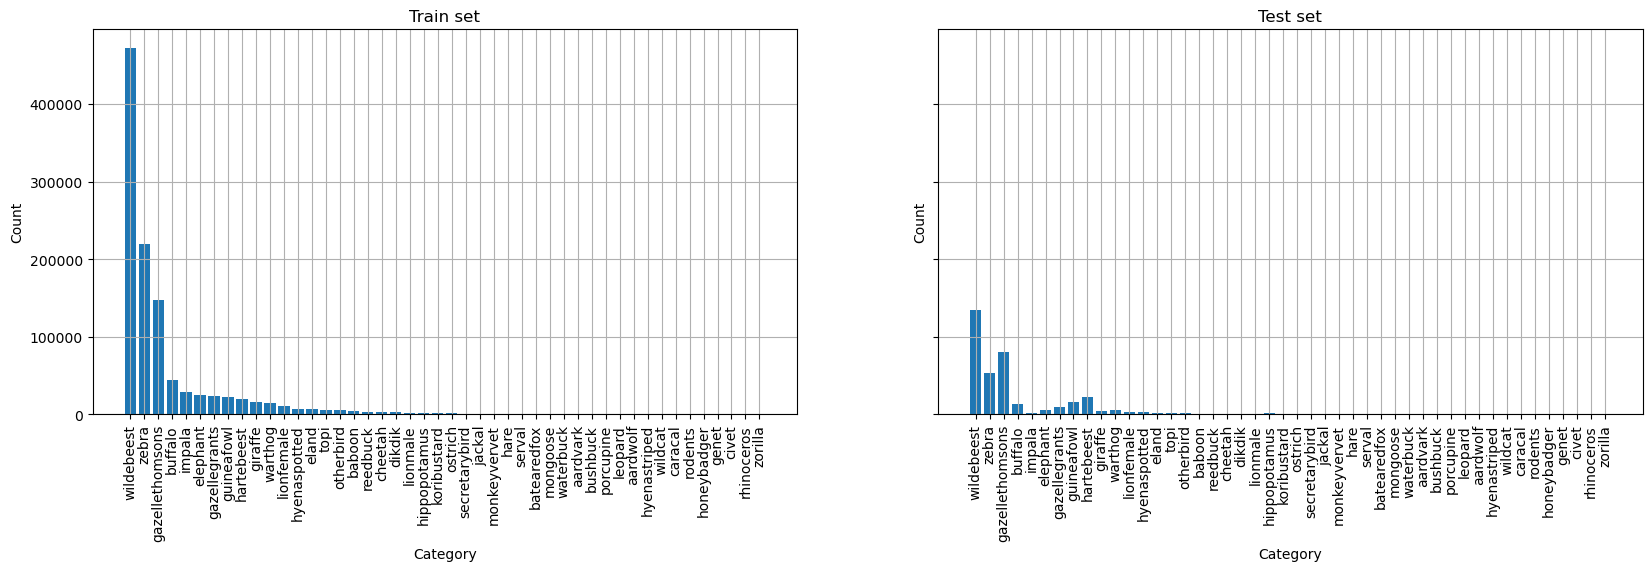

In [79]:
import matplotlib.pyplot as plt
species_name = [df_lut.name[i] for i in sorted_values]
fig, ax = plt.subplots(1,2, sharey=True, figsize=(20,5))
ax[0].bar(species_name, train_category,log=False)
ax[0].set_title('Train set')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(species_name,rotation=90)
ax[0].grid('y')

ax[1].bar(species_name, test_category,log=False)
ax[1].set_title('Test set')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(species_name,rotation=90)
ax[1].grid('y')
# plt.savefig(f'plots/train_test_distribution.png')
plt.show()

/var/folders/5f/83w09gxd6pq0h169x9168wcw0000gn/T/ipykernel_77663/3093181187.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(species_name,rotation=90)
/var/folders/5f/83w09gxd6pq0h169x9168wcw0000gn/T/ipykernel_77663/3093181187.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(species_name,rotation=90)


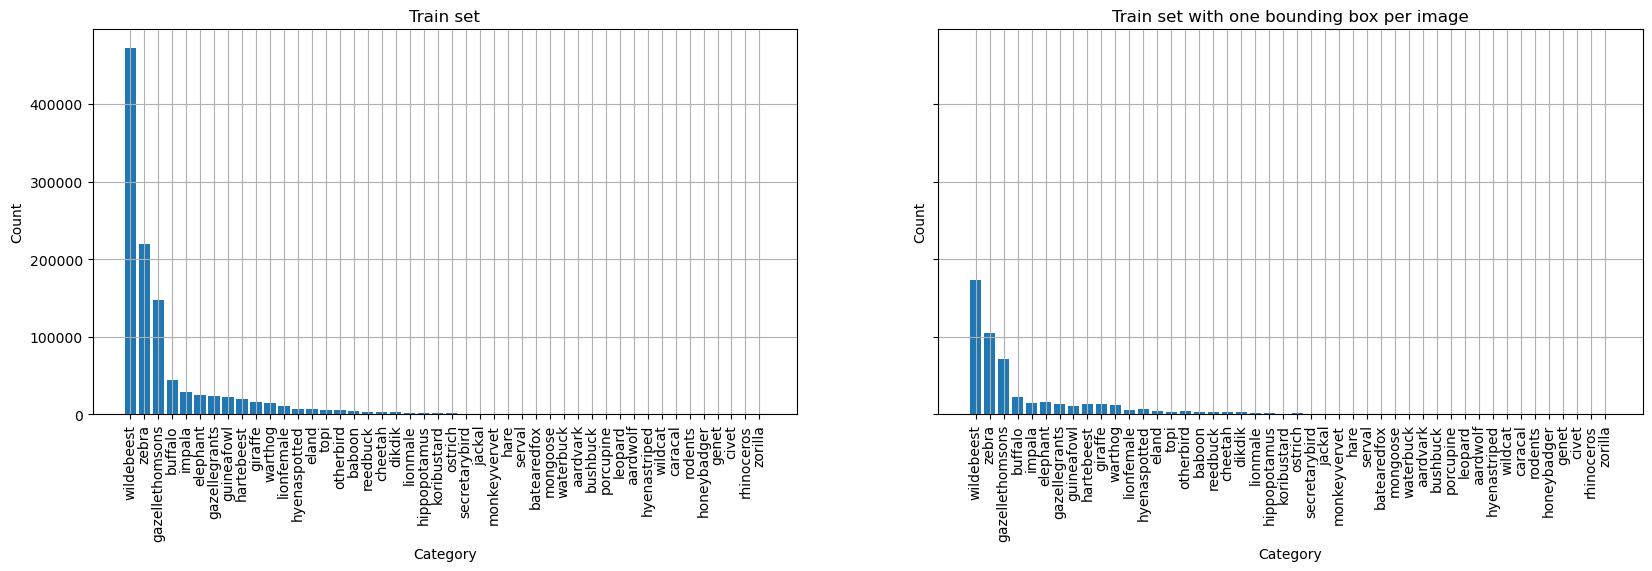

In [95]:
# df_train = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_train.df')
# df_train_after = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_unique_train.df')


train = df_train.category_id.value_counts()
test = df_train_after.category_id.value_counts()

test = test.reindex(train.index)

train_values, train_category = zip(*train.items())
test_values, test_category = zip(*test.items())

import matplotlib.pyplot as plt
species_name = [df_lut.name[i] for i in sorted_values]
fig, ax = plt.subplots(1,2, sharey=True, figsize=(20,5))
ax[0].bar(species_name, train_category,log=False)
ax[0].set_title('Train set')
ax[0].set_xlabel('Category')
ax[0].set_ylabel('Count')
ax[0].set_xticklabels(species_name,rotation=90)
ax[0].grid('y')

ax[1].bar(species_name, test_category,log=False)
ax[1].set_title('Train set with one bounding box per image')
ax[1].set_xlabel('Category')
ax[1].set_ylabel('Count')
ax[1].set_xticklabels(species_name,rotation=90)
ax[1].grid('y')
plt.savefig(f'plots/train_train_distribution.png')
plt.show()

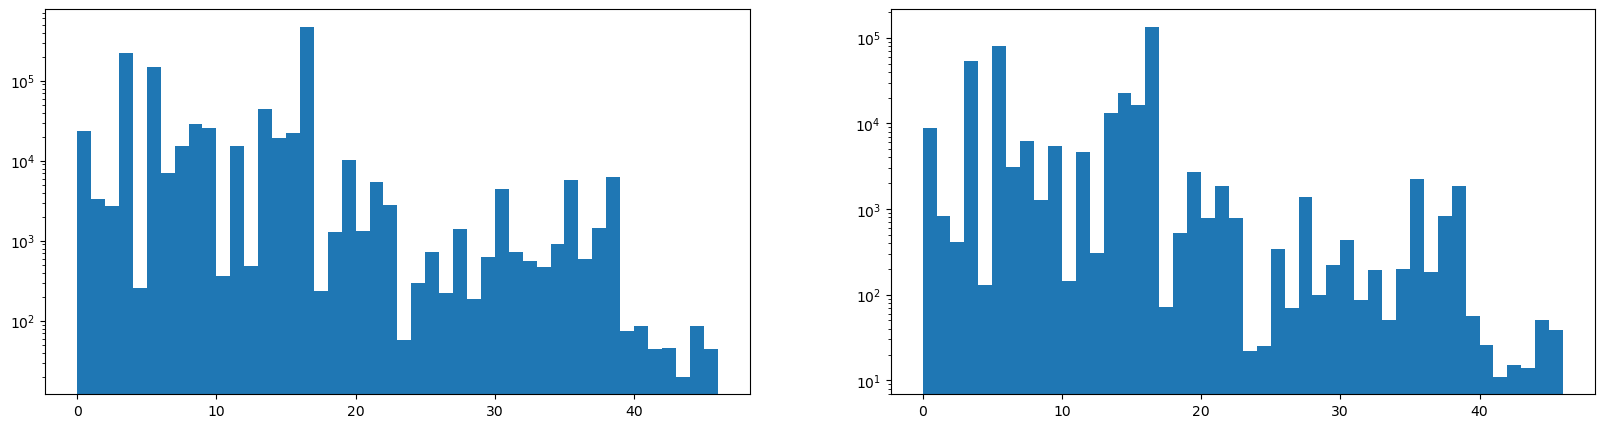

In [161]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, sharey=False, figsize=(20,5))


ax[0].hist(df_train.category_id, bins=np.arange(0,47,1))
ax[0].set_yscale('log')
ax[1].hist(df_test.category_id,bins=np.arange(0,47,1))
ax[1].set_yscale('log')
# ax[1,0].hist(df_train.category_id, bins=np.arange(0,47,1))
# ax[1,0].set_yscale('log')
# ax[1,0].set_ylim(1,100)
# ax[1,1].hist(df_test.category_id,bins=np.arange(0,47,1))
# ax[1,1].set_yscale('log')
# ax[1,1].set_ylim(1,100)
# ax[0,0].sharey(ax[0,1])


In [188]:
tmp = df_train.category_id.value_counts()
count = 1
for id, num in tmp.items():
    count*=

NameError: name 'df_train' is not defined

In [203]:
pool = df_train.category_id
len(set(pool))

46

In [205]:
count=0
for i in range(100000):
    n_draw = np.random.choice(pool,5000,replace=False)
    if len(set(n_draw))<46:
        count +=1

            
print(count)

100000


In [198]:
np.unique(n_draw,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
        37, 38, 39, 44]),
 array([ 117,   22,    8,  995,    3,  688,   22,   69,  115,  128,    2,
          72,    1,  195,   78,   97, 2188,    6,   45,    3,   20,   15,
           1,    2,    4,    1,    2,   15,    3,    6,    5,    4,   29,
           1,    4,   32,    1,    1]))

In [73]:
tmp_df_without_46.category_id.value_counts()

16    173551
3     105236
5      71578
13     21987
9      15988
8      15174
0      13558
11     13484
14     13434
7      11736
15     10389
6       6650
19      6133
21      4287
38      3985
35      3439
1       2916
30      2893
2       2437
22      2383
37      1366
27      1339
18      1108
20      1088
34       747
25       648
29       613
36       580
31       573
32       512
33       414
10       360
12       342
24       281
4        233
17       226
26       217
28       186
40        87
44        86
39        71
23        55
42        46
41        44
45        42
43        20
Name: category_id, dtype: int64

In [3]:
import random
# Interleave labelled and unlabelled batches.
NUM_TRAIN = 512522
indices = list(range(NUM_TRAIN))
random.seed(1234)
random.shuffle(indices)

labeled_set = indices[:5000]
unlabeled_set = list(set(indices) - set(labeled_set)) #[x for x in indices if x not in labeled_set]
random.shuffle(unlabeled_set)
BATCH= 128
SUBSET = 200000#512522
if SUBSET < len(labeled_set):
    SUBSET = len(labeled_set)
k = int(SUBSET/BATCH)
SUBSET = k * BATCH
subset = unlabeled_set[:SUBSET]
assert NUM_TRAIN == len(labeled_set) + len(unlabeled_set)
print(f'labeled set: {len(labeled_set)}')
print(f'unlabeled set: {len(unlabeled_set)}')
print(f'SUBSET: {SUBSET}')
print(f'subset: {len(subset)}')
print(f'k: {k}')
print("-------------------")

if len(subset)>len(labeled_set):
    print(f'lenght labeled_set {len(labeled_set)}')
    print(f'lenght batch {BATCH}')
    print(f'calc {int(len(labeled_set)/BATCH)}')
    interleaved_size = 2 * int(len(labeled_set)/BATCH) * BATCH
else:
    interleaved_size = 2 * int(len(subset)/BATCH) * BATCH
print(f'interleaved_size: {interleaved_size}')
interleaved = np.zeros((interleaved_size)).astype(int)
if len(labeled_set)>len(subset):
    l_mixed_set = len(subset)

else:
    l_mixed_set = len(labeled_set) 
    
for cnt in range(2*int(l_mixed_set/BATCH)):
    idx = int(cnt / 2)
    if cnt % 2 == 0:
        interleaved[cnt*BATCH:(cnt+1)*BATCH] = labeled_set[idx*BATCH:(idx+1)*BATCH]                             
    else:
        interleaved[cnt*BATCH:(cnt+1)*BATCH] = subset[idx*BATCH:(idx+1)*BATCH] 

interleaved = interleaved.tolist()
print(f'interleaved: {interleaved}')
# if len(subset)>len(labeled_set):
#     interleaved = interleaved + subset[(idx+1)*BATCH:]
# else:
#     interleaved = interleaved + labeled_set[(idx+1)*BATCH:]
last_interleaved = idx

print(last_interleaved)

labeled set: 5000
unlabeled set: 507522
SUBSET: 199936
subset: 199936
k: 1562
-------------------
lenght labeled_set 5000
lenght batch 128
calc 39
interleaved_size: 9984
interleaved: [220106, 341753, 260501, 469287, 483919, 251981, 408570, 2864, 470222, 355644, 468555, 180034, 13910, 82343, 66718, 24668, 167667, 212026, 245305, 461498, 172260, 225663, 261464, 36070, 392873, 176213, 430336, 476819, 449074, 284095, 383039, 309768, 506530, 191125, 469657, 16786, 216596, 356009, 300094, 503459, 183850, 152610, 149261, 140331, 202914, 48569, 139776, 223390, 433636, 82281, 412933, 360345, 100588, 397661, 186032, 253255, 480473, 392618, 5067, 295048, 446089, 395350, 215914, 152731, 463463, 339412, 36625, 262667, 379386, 60412, 481513, 102606, 506012, 345078, 413147, 128019, 236600, 372550, 186948, 196756, 486432, 406268, 226693, 336925, 443443, 512294, 35034, 249598, 215874, 187475, 7984, 161467, 410547, 190455, 230721, 285760, 338676, 449004, 100697, 435310, 15608, 243683, 38904, 42161, 1682

In [1]:
run_id = '20240533'
ssl_id = 'mobyv2al'
dataset_id = 'SnapshotSerengetiSmall'
path_to_folder = f'/Volumes/data01/waitsun/result_data_analysis/{dataset_id}_{ssl_id}_{run_id}/'

backbone_model = path_to_folder + f'backbonehcss_{dataset_id}_0.pth'
classifier_model = path_to_folder + f'classifierhcss_{dataset_id}_0.pth'
lb_indices = path_to_folder + f'{dataset_id}_{ssl_id}_{run_id}_0_labeldispersion_indices.pkl'
y_pred = path_to_folder + f'{dataset_id}_{ssl_id}_{run_id}_0_prediction_label.npy'
y_true = path_to_folder + f'{dataset_id}_{ssl_id}_{run_id}_0_truth_label.npy'

import pickle
import numpy as np

with open(lb_indices, 'rb') as f:
    lb_indices = pickle.load(f)

y_pred = np.load(y_pred)
y_true = np.load(y_true)

In [6]:
import numpy as np
import sys

sys.getsizeof(np.zeros((500000,512)))

2048000128

In [116]:
from sklearn.metrics import pairwise_distances
from kcenterGreedy import kCenterGreedy

x = np.random.randint(1, 11, size=(15, 2))
points = np.random.randint(1, 10000, size=(30, 2))
print(x.shape)
sampling = kCenterGreedy(points)
sampling.select_batch_(np.arange(20,30),5)

(15, 2)
Getting transformed features...
Calculating distances...
Using flat_X as features.
Maximum distance from cluster centers is 1540.44


[13, 14, 17, 2, 12]

In [100]:
[25, 0, 22, 32, 27, 21, 30, 24, 4, 36]

(50, 1)

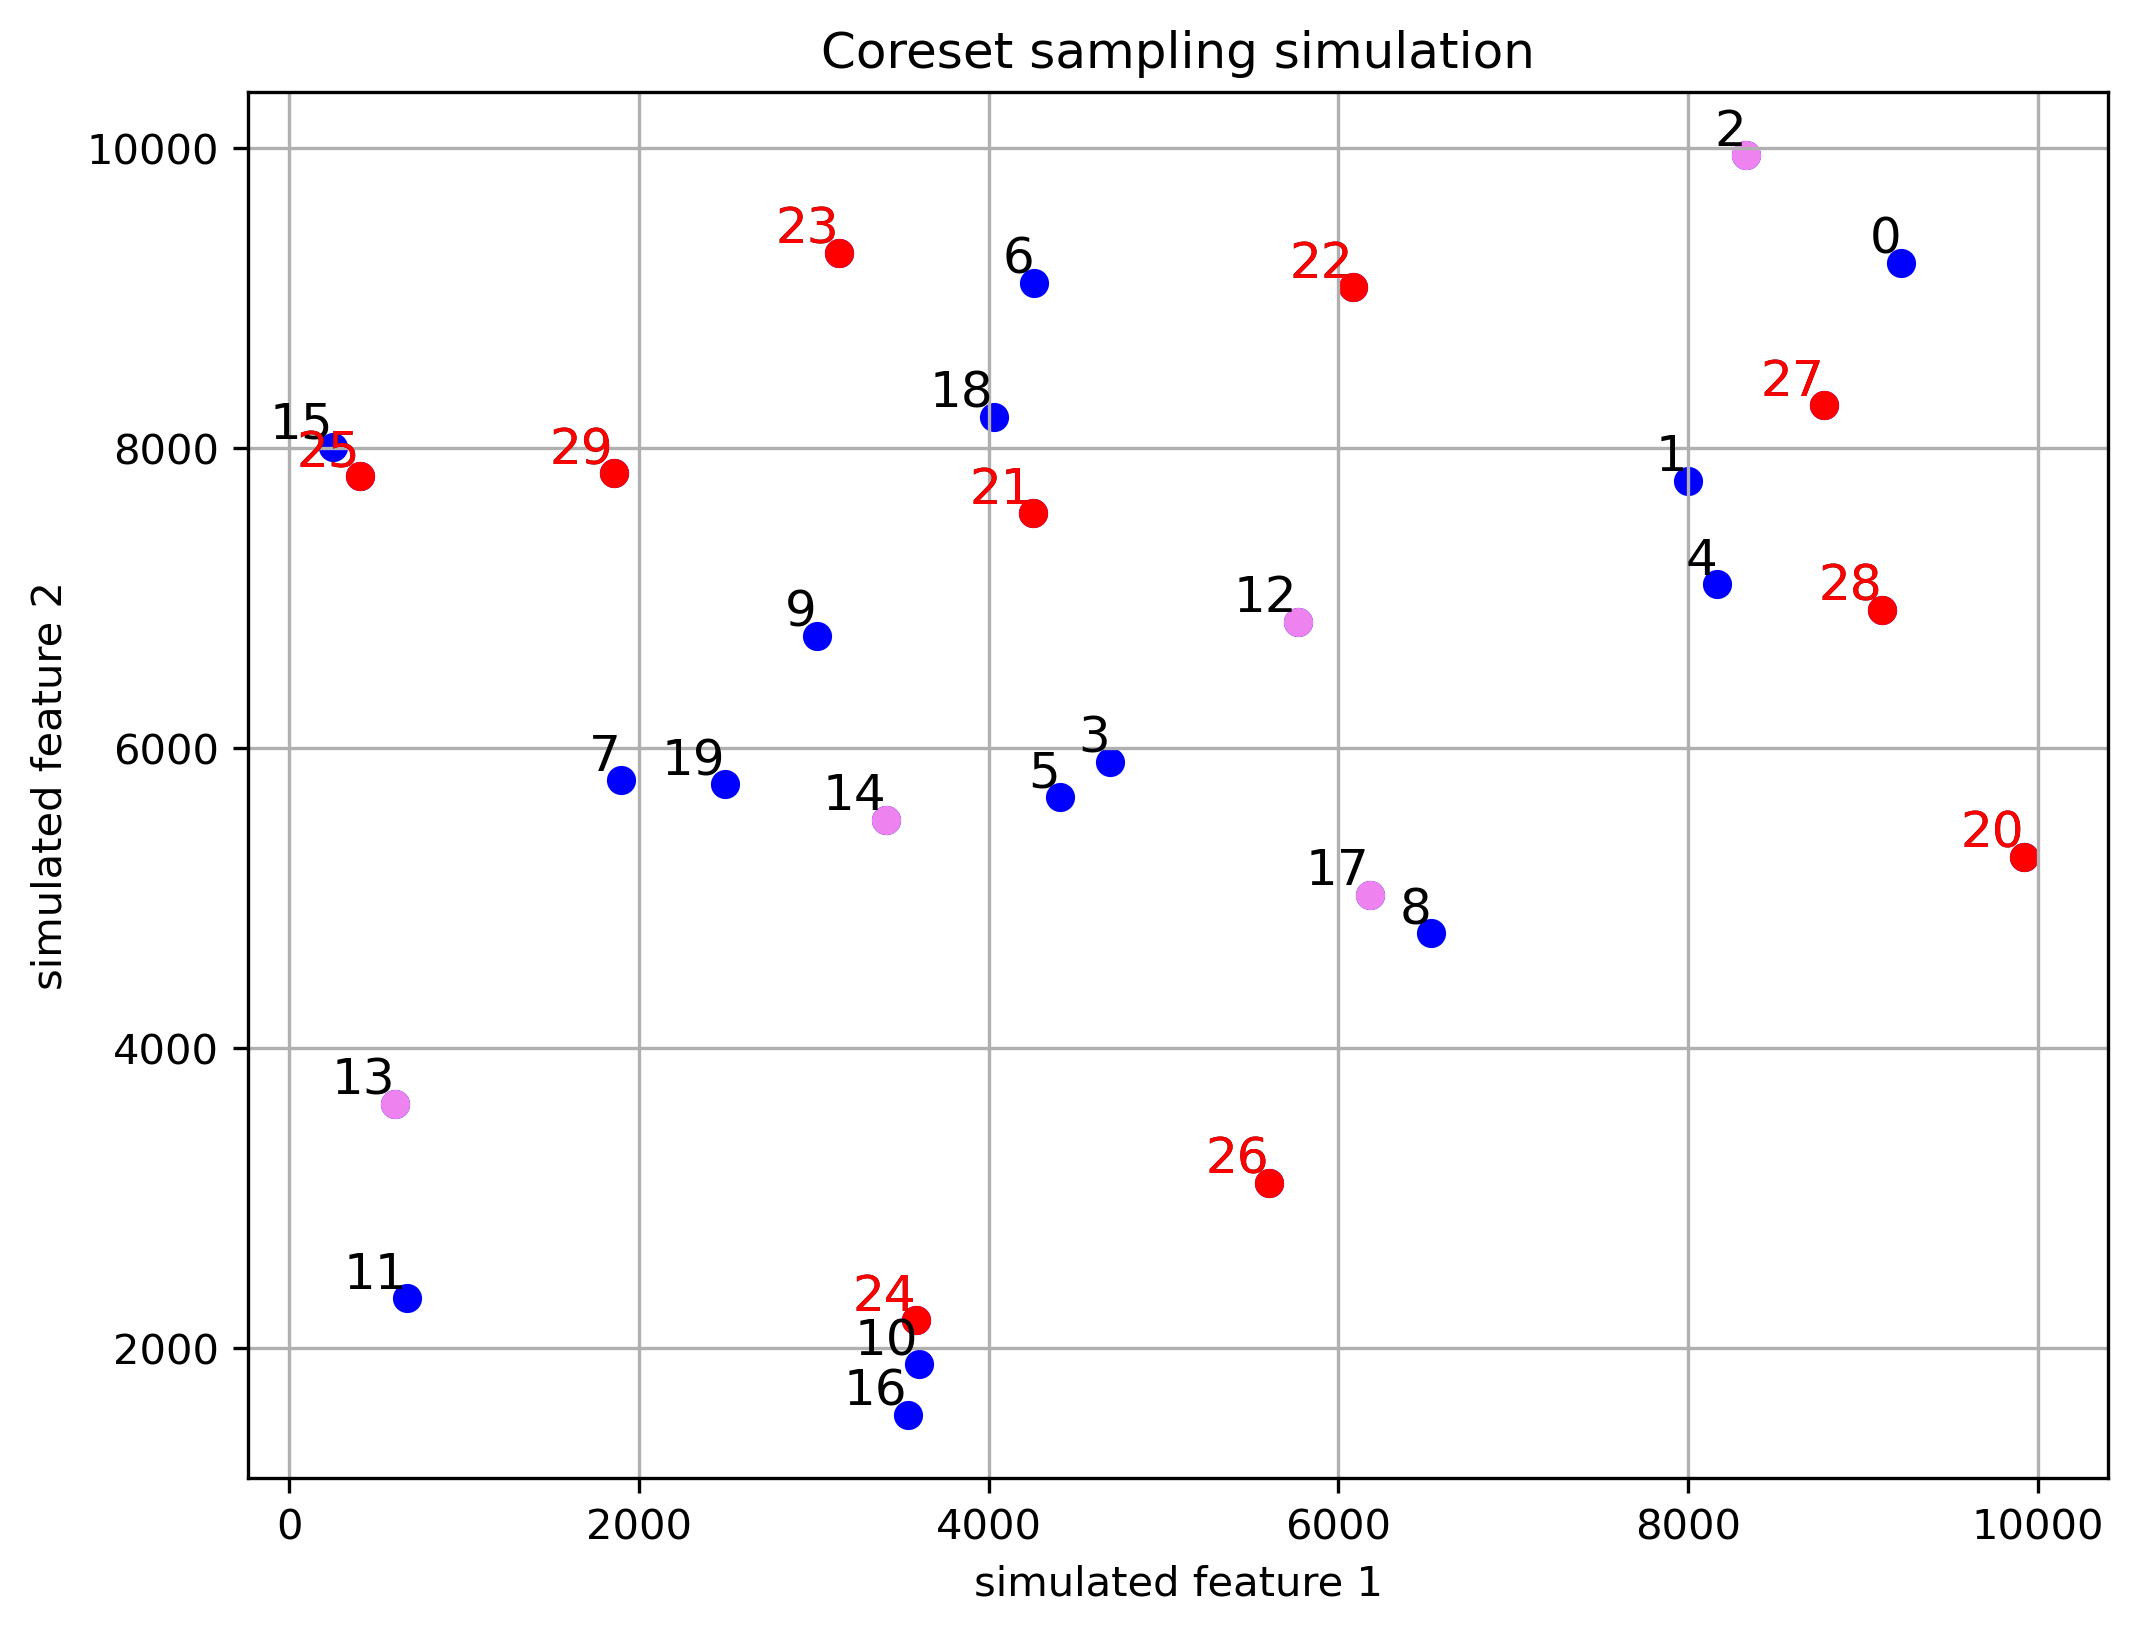

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Generate 10 random points in a 2D space, where each coordinate is an integer in the range [1, 10]


# Create a scatter plot
plt.figure(figsize=(8, 6),dpi=300)
plt.scatter(points[:, 0], points[:, 1], color='blue')
r =  1558.49
sampled = [13, 14, 17, 2, 12]
# Label each point and draw a circle around it
ax = plt.gca()  # Get current axis
for i, (x, y) in enumerate(points):
    plt.text(x, y, f'{i}', fontsize=12, ha='right', va='bottom')
    if i>=20 :
        # circle = Circle((x, y), radius=r, edgecolor='red', facecolor='none')
        # ax.add_patch(circle)
        plt.text(x, y, f'{i}', fontsize=12, ha='right', va='bottom',color='red')
        plt.scatter(x, y, color='red')
    if i in sampled:
        plt.scatter(x, y, color='violet')
# Set plot limits to ensure all circles are fully visible
# plt.xlim(0, 14)
# plt.ylim(0, 14)

# Set plot labels and title
plt.xlabel('simulated feature 1')
plt.ylabel('simulated feature 2')
plt.title('Coreset sampling simulation')

# Show the plot
plt.grid(True)
plt.show()


In [96]:
def euclidean_distance(point1, point2):
    # Convert the points to numpy arrays
    point1 = np.array(point1)
    point2 = np.array(point2)
    
    # Calculate the Euclidean distance
    distance = np.linalg.norm(point1 - point2)
    return distance

euclidean_distance(points[10],points[43])

3374.9211842649006

In [111]:
import pickle
path = '/Volumes/data01/waitsun/result_data_analysis/SnapshotSerengetiSmall_mobyv2al_20240537'
pseudo_labels = []
dataset_id ='SnapshotSerengetiSmall'
ssl_id = 'mobyv2al'
run_id = '20240537'
for i in range(4):
    end_path = f'{path}/{dataset_id}_{ssl_id}_{run_id}_{i}_pseudo_labels.pkl'
    with open(end_path,'rb') as f:
        tmp = pickle.load(f)
    pseudo_labels.append(tmp)

In [112]:
print(len(pseudo_labels[0]))
print(len(pseudo_labels[1]))
print(len(pseudo_labels[2]))
print(len(pseudo_labels[3]))


5106
11981
11981
11981


In [114]:
s_1 = set(pseudo_labels[3].keys())
s_2 = set(pseudo_labels[1].keys())

count = 0
for i in s_1:
    if i in s_2:
        count += 1
count

11981

In [124]:

for cycle in range(4):
    if cycle == 0:
        pseudo_labels = {}
    else:
        with open(f'{cycle-1}_pseudo_labels.pkl', 'rb') as file:
                        pseudo_labels = pickle.load(file)

    pseudo_labels[cycle] = cycle
    
    with open(f'{cycle}_pseudo_labels.pkl', 'wb') as file:
        pickle.dump(pseudo_labels, file)

## Draw bounding boxes

In [129]:
from PIL import ImageDraw

In [124]:
import pandas as pd
df_master = pd.read_pickle('/Volumes/data01/waitsun/snapshotSerengetiCropedResized/df_metadata_master.df')

In [151]:
df_master.head()

,img_name,bbox_pixel_level,category_id
0,S1/L07/L07_R1/S1_L07_R1_PICT0103,"[178.91328, 0.0, 1585.9712, 1440.9216000000001]",11
1,S1/L07/L07_R1/S1_L07_R1_PICT0234,"[1268.1216, 0.0, 771.8912, 1408.8192]",11
2,S1/L07/L07_R1/S1_L07_R1_PICT0072,"[33.32096, 0.0, 2014.6176, 1446.2975999999999]",9
3,S1/L07/L07_R1/S1_L07_R1_PICT0020,"[0.3639296, 1133.4144000000001, 131.21536, 300...",16
4,S1/L07/L07_R1/S1_L07_R1_PICT0122,"[719.872, 14.737919999999999, 1327.9232, 1253....",11


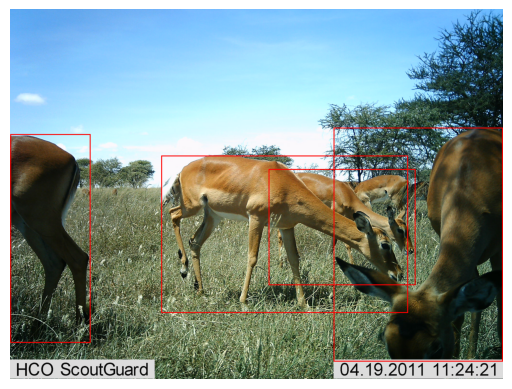

In [187]:
tmp = df_master[df_master.img_name == 'S2/E04/E04_R2/S2_E04_R2_IMAG0094']
# tmp = df_master[df_master.img_name == 'S2/E04/E04_R3/S2_E04_R3_IMAG0443']
path = '/Volumes/data01/waitsun/snapshotSerengeti/S2/E04/E04_R2/S2_E04_R2_IMAG0094.JPG'
img = Image.open(path)
for img_path, bbox in zip(tmp.img_name, tmp.bbox_pixel_level):
    draw = ImageDraw.Draw(img)
     # top, left, height, width -> bbox
    # Draw the bounding box
    # bbox should be in the format [left, top, right, bottom]
    draw.rectangle(((bbox[0],bbox[1]),(bbox[0]+ bbox[2], bbox[1] + bbox[3])), outline="red", width=4)

    plt.imshow(img)
    plt.axis('off')

In [168]:
x = np.unique(df_master.img_name, return_counts=True)
x = [x1 for (x1, x2) in zip(*x) if x2 > 1] 

In [180]:
tmp = df_master.groupby('img_name')['category_id'].apply(set).reset_index()


In [185]:
tmp.category_id.apply(len)

0         1
1         1
2         1
3         1
4         1
         ..
689562    1
689563    1
689564    1
689565    1
689566    1
Name: category_id, Length: 689567, dtype: int64

(2048, 1536)


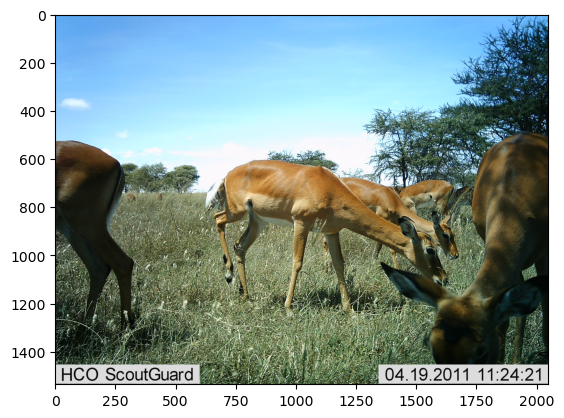

In [122]:
from PIL import Image

path = '/Volumes/data01/waitsun/snapshotSerengeti/S2/E04/E04_R2/S2_E04_R2_IMAG0094.JPG'
img = Image.open(path)
plt.imshow(img)
print(img.size)

In [137]:
np.array(img).shape

(1536, 2048, 3)